<a href="https://colab.research.google.com/github/IndraLukasTjahaja/Digital_Credit_Risk/blob/main/Bab%202%20-%20Credit%20Scoring%20Modeling%20dengan%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 2.3.2.1 Persiapan data dan impor ke Python

In [2]:
# 2.3.2.2 Impor data di Python

# library panda untuk menggunakan data frame
import pandas as pd

# Impor data dari excel xls ke Python
# Pembaca dapat langsung menunjuk kepada file excel yang terletak di website pendamping buku ini
# atau mengunduh terlebih dahulu dan menunjuk ke file excel di lokasi hard drive
# contoh: df = pd.read_excel('C:\User\pembaca\downloads\Credit_Scoring_Dataset.xlsx')

df = pd.read_excel('https://github.com/IndraLukasTjahaja/Digital_Credit_Risk/raw/main/Credit_Scoring_Dataset.xlsx')

In [3]:
# 2.3.2.3 Struktur data

# Melihat sample dari dataset
df.head(10) # Menampilkan 10 baris teratas dari dataframe df

,ID,gagal_bayar,Lama_Cicilan,Tujuan_Pinjaman,Jumlah_Pinjaman,Pekerjaan,Pendapatan_perbulan,Lama_Bekerja,Status,Kepemilikan_Rumah,Alamat_Rumah,Alamat_Kantor,Usia,Lama_tinggal_ditempat_sekarang,SLIK_Kolektibilitas,SLIK_Cicilan_Bulanan,SLIK_Outstanding_CC,API_CreditScore_Vendor_A,API_CreditScore_Vendor_B,Device_Type,Device_Apps_Installed,Device_Active_Since,Device_Apps_Segmentation,Mobile_Provider,Mobile_Number_Active_Since,Email_Domain_Type
0,ABC0305,1_Gagal,6,barang_baru,3000000,1_pegawai_tetap,3. 5 - 10 juta,3_1-4_tahun_kerja,2_menikah,3_bersama_keluarga,Daerah_1,Daerah_3,44.0,2_1-5_tahun,Kolek 1,4.378917e+06,0.000000e+00,755,243,Android,110,3_Lebih_3_tahun,Online_Lending,Telco_E,1_Kurang_1_bulan,Professional_Domain
1,ABC0912,1_Gagal,4,elektronik,1000000,3_wiraswasta,1. < 1 juta,2_<1_tahun_kerja,1_belum_menikah,1_milik_sendiri,Daerah_1,Daerah_4,25.0,4_>10_tahun,Kolek 1,1.847654e+06,0.000000e+00,37,153,Android,94,3_Lebih_3_tahun,Games,Telco_D,1_Kurang_1_bulan,Public_Domain
2,ABC0919,1_Gagal,4,elektronik,1000000,1_pegawai_tetap,2. 1 - 5 juta,1_tidak_bekerja,3_bercerai,1_milik_sendiri,Daerah_2,Daerah_1,33.0,1_<1_tahun,Kolek 3,1.552715e+06,3.496970e+06,260,134,Android,92,3_Lebih_3_tahun,Shopping,Telco_D,1_Kurang_1_bulan,Public_Domain
3,ABC0231,1_Gagal,5,peralatan_rumahtangga,1000000,1_pegawai_tetap,1. < 1 juta,3_1-4_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_2,Daerah_1,26.0,2_1-5_tahun,Kolek 3,3.035073e+06,1.377374e+07,66,87,Android,109,3_Lebih_3_tahun,Shopping,Telco_E,1_Kurang_1_bulan,Public_Domain
4,ABC0584,1_Gagal,5,makanan,1000000,3_wiraswasta,1. < 1 juta,2_<1_tahun_kerja,2_menikah,2_sewa,Daerah_2,Daerah_4,33.0,1_<1_tahun,Kolek 3,4.466642e+06,7.167619e+06,555,71,Android,108,3_Lebih_3_tahun,Shopping,Telco_E,3_1_ke_2_tahun,Public_Domain
5,ABC0019,1_Gagal,4,barang_bekas,3000000,4_tidak_bekerja,1. < 1 juta,5_>7_tahun_kerja,1_belum_menikah,3_bersama_keluarga,Daerah_1,Daerah_4,44.0,2_1-5_tahun,Kolek 3,2.011016e+06,3.213540e+06,549,276,Android,107,3_Lebih_3_tahun,Online_Lending,Telco_D,4_2_ke_5_tahun,Public_Domain
6,ABC0982,1_Gagal,6,buka_bisnis,1000000,4_tidak_bekerja,1. < 1 juta,1_tidak_bekerja,2_menikah,2_sewa,Daerah_1,Daerah_4,33.0,2_1-5_tahun,Kolek 3,1.133102e+06,2.869847e+06,71,61,IOS,95,3_Lebih_3_tahun,Shopping,Telco_E,1_Kurang_1_bulan,Public_Domain
7,ABC0973,1_Gagal,4,barang_baru,500000,2_pegawai_kontrak,1. < 1 juta,1_tidak_bekerja,1_belum_menikah,2_sewa,Daerah_3,Daerah_4,29.0,4_>10_tahun,Kolek 5,3.657394e+06,1.150781e+07,374,164,Android,106,3_Lebih_3_tahun,Social_Media,Telco_C,1_Kurang_1_bulan,Public_Domain
8,ABC0886,1_Gagal,2,liburan,500000,1_pegawai_tetap,1. < 1 juta,2_<1_tahun_kerja,1_belum_menikah,1_milik_sendiri,Daerah_2,Daerah_3,53.0,4_>10_tahun,Kolek 3,3.107034e+06,6.698394e+06,30,132,Android,105,3_Lebih_3_tahun,Social_Media,Telco_A,2_Kurang_1_tahun,Public_Domain
9,ABC0653,1_Gagal,4,barang_baru,1000000,1_pegawai_tetap,1. < 1 juta,5_>7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_1,Daerah_3,45.0,1_<1_tahun,Kolek 3,4.020783e+06,5.079741e+06,444,170,Android,105,3_Lebih_3_tahun,Shopping,Telco_D,1_Kurang_1_bulan,Public_Domain


In [4]:
# Melihat penjelasan singkat dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              999 non-null    object 
 1   gagal_bayar                     991 non-null    object 
 2   Lama_Cicilan                    1000 non-null   int64  
 3   Tujuan_Pinjaman                 995 non-null    object 
 4   Jumlah_Pinjaman                 1000 non-null   int64  
 5   Pekerjaan                       987 non-null    object 
 6   Pendapatan_perbulan             989 non-null    object 
 7   Lama_Bekerja                    972 non-null    object 
 8   Status                          995 non-null    object 
 9   Kepemilikan_Rumah               996 non-null    object 
 10  Alamat_Rumah                    1000 non-null   object 
 11  Alamat_Kantor                   1000 non-null   object 
 12  Usia                            998

In [5]:
# 2.3.2.4 Tipe data

# Merubah tipe data menjadi tipe karakter kategori
df['ID'] = df.ID.astype('category')
df['gagal_bayar'] = df.gagal_bayar.astype('category')
df['Pekerjaan'] = df.Pekerjaan.astype('category')
df['Tujuan_Pinjaman'] = df.Tujuan_Pinjaman.astype('category')
df['Pendapatan_perbulan'] = df.Pendapatan_perbulan.astype('category')
df['Lama_Bekerja'] = df.Lama_Bekerja.astype('category')
df['Status'] = df.Status.astype('category')
df['Kepemilikan_Rumah'] = df.Kepemilikan_Rumah.astype('category')
df['Alamat_Rumah'] = df.Alamat_Rumah.astype('category')
df['Alamat_Kantor'] = df.Alamat_Kantor.astype('category')
df['Lama_tinggal_ditempat_sekarang'] = df.Lama_tinggal_ditempat_sekarang.astype('category')
df['Device_Type'] = df.Device_Type.astype('category')
df['Device_Active_Since'] = df.Device_Active_Since.astype('category')
df['SLIK_Kolektibilitas'] = df.SLIK_Kolektibilitas.astype('category')
df['Device_Apps_Segmentation'] = df.Device_Apps_Segmentation.astype('category')
df['Mobile_Provider'] = df.Mobile_Provider.astype('category')
df['Mobile_Number_Active_Since'] = df.Mobile_Number_Active_Since.astype('category')
df['Email_Domain_Type'] = df.Email_Domain_Type.astype('category')

# Merubah tipe data menjadi tipe karakter int64
# Gunakan intger untuk angka bulat
df['API_CreditScore_Vendor_A'] = df.API_CreditScore_Vendor_A.astype('int64')
df['API_CreditScore_Vendor_B'] = df.API_CreditScore_Vendor_B.astype('int64')
df['Device_Apps_Installed'] = df.Device_Apps_Installed.astype('int64')

# Merubah tipe data menjadi tipe karakter float64
# Gunakan intger untuk angka dengan koma
# Jika dalam kolom tersebut terdapat null, maka harus di simpan dalam tipe float
df['Lama_Cicilan'] = df.Lama_Cicilan.astype('float64')
df['Usia'] = df.Usia.astype('float64')
df['Jumlah_Pinjaman'] = df.Jumlah_Pinjaman.astype('float64')
df['SLIK_Cicilan_Bulanan'] = df.SLIK_Cicilan_Bulanan.astype('float64')
df['SLIK_Outstanding_CC'] = df.SLIK_Outstanding_CC.astype('float64')

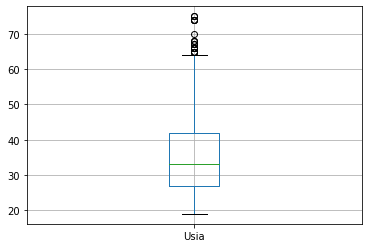

In [6]:
# 2.3.2.5.3 Mengidentifikasi outlier dan validitas data

df.boxplot(column=['Usia'])

In [7]:
# 2.3.2.5.4.1 Imputasi baris data yang kosong dengan asumsi nilai

# Koding berikut menggantikan missing value dari semua variabel dengan
# nilai yang paling sering muncul (modus) untuk variabel kategori dan nilai rata-rata untuk variabel numerik

# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df.select_dtypes(include=['float64','int64','int'])
df_kategori = df.select_dtypes(exclude = ['float64','int64','int'])

for kolom in df_numerik.columns:
  df_numerik[kolom].fillna(df_numerik[kolom].mean(), inplace=True)

for kolom in df_kategori.columns:
  df_kategori[kolom].fillna(df_kategori[kolom].mode()[0], inplace=True)

# Menggabungkan dataset variabel kategori dan dengan variabel numerik
df_pembersihan_1 = pd.concat([df_numerik, df_kategori], axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [8]:
# 2.3.2.5.4.2 Tidak menggunakan baris data yang kosong (Drop Data)

# Menggunakan fungsi dropna() untuk menghapus semua baris yang memiliki data kosong
df_pembersihan_2 = df.dropna()

In [9]:
# 2.3.2.5.4.3 Tidak menggunakan kolom data yang kosong (Drop Variable)

# Menggunakan fungsi dropna() untuk menghapus kolom yang memiliki data kosong
df_pembersihan_3 = df.dropna(axis='columns')

In [10]:
# 2.3.2.5.4.4 Kategorikan data yang kosong (Flag)

# Koding berikut memberikan tanda flagging untuk baris data yang berisikan baris data kosong

# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df.select_dtypes(include=['float64','int64','int'])
df_kategori = df.select_dtypes(exclude = ['float64','int64','int'])

for kolom in df_numerik.columns:
  # Membuat kolom baru untuk baris data yang kosong
  df_numerik[kolom+"_missing"] = df_numerik[kolom].isnull()
  df_numerik[kolom].fillna(0, inplace=True)

for kolom in df_kategori.columns:
  # Kolom kategori harus secara eksplisit menambahkan data kategori baru
  df_kategori[kolom] = df_kategori[kolom].cat.add_categories("00_Data_Kosong")
  df_kategori[kolom].fillna("00_Data_Kosong", inplace=True)

# Menggabungkan dataset variabel kategori dan dengan variabel numerik
df_pembersihan_4 = pd.concat([df_numerik, df_kategori], axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [11]:
# Melanjutkan proses dengan asumsi bahwa baris data yang kosong tidak signifikan dan tidak akan terjadi baris data kosong lagi.
df_clean = df_pembersihan_2

In [12]:
df_clean.info()
# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df_clean.to_csv('df_clean.csv') 
files.download('df_clean.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 990
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              936 non-null    category
 1   gagal_bayar                     936 non-null    category
 2   Lama_Cicilan                    936 non-null    float64 
 3   Tujuan_Pinjaman                 936 non-null    category
 4   Jumlah_Pinjaman                 936 non-null    float64 
 5   Pekerjaan                       936 non-null    category
 6   Pendapatan_perbulan             936 non-null    category
 7   Lama_Bekerja                    936 non-null    category
 8   Status                          936 non-null    category
 9   Kepemilikan_Rumah               936 non-null    category
 10  Alamat_Rumah                    936 non-null    category
 11  Alamat_Kantor                   936 non-null    category
 12  Usia                  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
# 2.3.2.5.5.1 EDA Analisa dasar variabel untuk gagal_bayar

# Untuk melihat frekuensi dari variabel gagal_bayar
print(df_clean['gagal_bayar'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel gagal_bayar
print(df_clean['gagal_bayar'].value_counts(normalize=True) * 100)

0_Bayar    659
1_Gagal    277
Name: gagal_bayar, dtype: int64
0_Bayar    70.405983
1_Gagal    29.594017
Name: gagal_bayar, dtype: float64


In [14]:
# 2.3.2.5.5.2 Exploratory Data Analysis untuk SLIK_Kolektabilitas

# Untuk melihat frekuensi dari variabel SLIK_Kolektabilitas
print(df_clean['SLIK_Kolektibilitas'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel SLIK_Kolektabilitas
print(df_clean['SLIK_Kolektibilitas'].value_counts(normalize=True) * 100)

Kolek 3            477
Kolek 1            269
Kolek 2             82
Tidak_Ditemukan     47
Kolek 5             47
Kolek 4             14
Name: SLIK_Kolektibilitas, dtype: int64
Kolek 3            50.961538
Kolek 1            28.739316
Kolek 2             8.760684
Tidak_Ditemukan     5.021368
Kolek 5             5.021368
Kolek 4             1.495726
Name: SLIK_Kolektibilitas, dtype: float64


In [15]:
# Berapa banyak yang gagal bayar dari masing-masing nilai SLIK Kolektabilitas
print(pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar']))

# dalam proporsi persentase
print(pd.crosstab(df_clean['SLIK_Kolektibilitas'],df_clean['gagal_bayar'],normalize='index',)*100)

gagal_bayar          0_Bayar  1_Gagal
SLIK_Kolektibilitas                  
Kolek 1                  228       41
Kolek 2                   57       25
Kolek 3                  327      150
Kolek 4                    6        8
Kolek 5                   20       27
Tidak_Ditemukan           21       26
gagal_bayar            0_Bayar    1_Gagal
SLIK_Kolektibilitas                      
Kolek 1              84.758364  15.241636
Kolek 2              69.512195  30.487805
Kolek 3              68.553459  31.446541
Kolek 4              42.857143  57.142857
Kolek 5              42.553191  57.446809
Tidak_Ditemukan      44.680851  55.319149


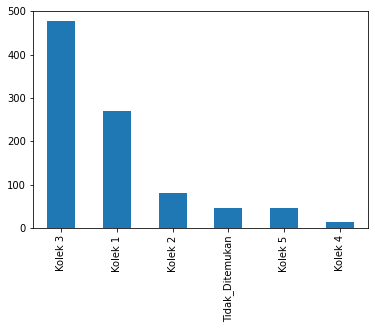

In [16]:
# 2.3.2.5.5.2 SLIK_Kolektibilitas Data Visualisasi

# Fungsi value_counts().plot(kind='bar')
df_clean['SLIK_Kolektibilitas'].value_counts().plot(kind='bar')

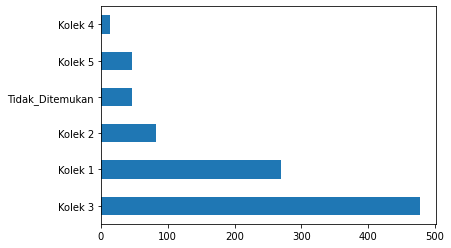

In [17]:
# Menampilkan plot bar secara horizontal
df_clean['SLIK_Kolektibilitas'].value_counts().plot(kind='barh')

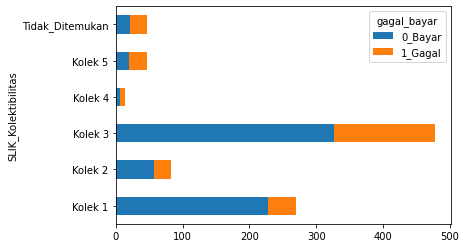

In [18]:
# Nilai variabel SLIK_Kolektibilitas dan proporsi default secara plot bar
pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar']).plot(kind='barh', stacked=True)

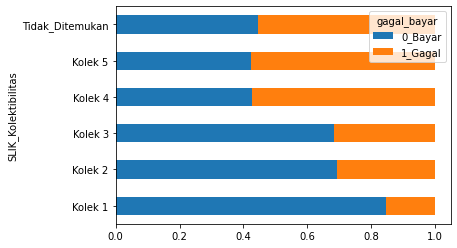

In [19]:
# Nilai variabel SLIK_Kolektibilitas dan proporsi default secara plot bar, secara proporsi
pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar'], normalize='index').plot(kind='barh', stacked=True)

In [20]:
# 2.3.2.5.5.3 Exploratory Data Analysis untuk Usia

# Rangkuman statistik untuk variabel numerik Usia
print(df_clean['Usia'].describe())

# Rangkuman statistik untuk variabel numerik Usia, berdasarkan default (gagal bayar atau tidak)
df_clean.groupby('gagal_bayar')['Usia'].describe()

count    936.000000
mean      35.595085
std       11.358124
min       19.000000
25%       27.000000
50%       33.000000
75%       42.000000
max       75.000000
Name: Usia, dtype: float64


,count,mean,std,min,25%,50%,75%,max
gagal_bayar,,,,,,,,
0_Bayar,659.0,36.224583,11.286323,19.0,27.0,34.0,42.5,75.0
1_Gagal,277.0,34.097473,11.408484,19.0,25.0,31.0,40.0,74.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot')

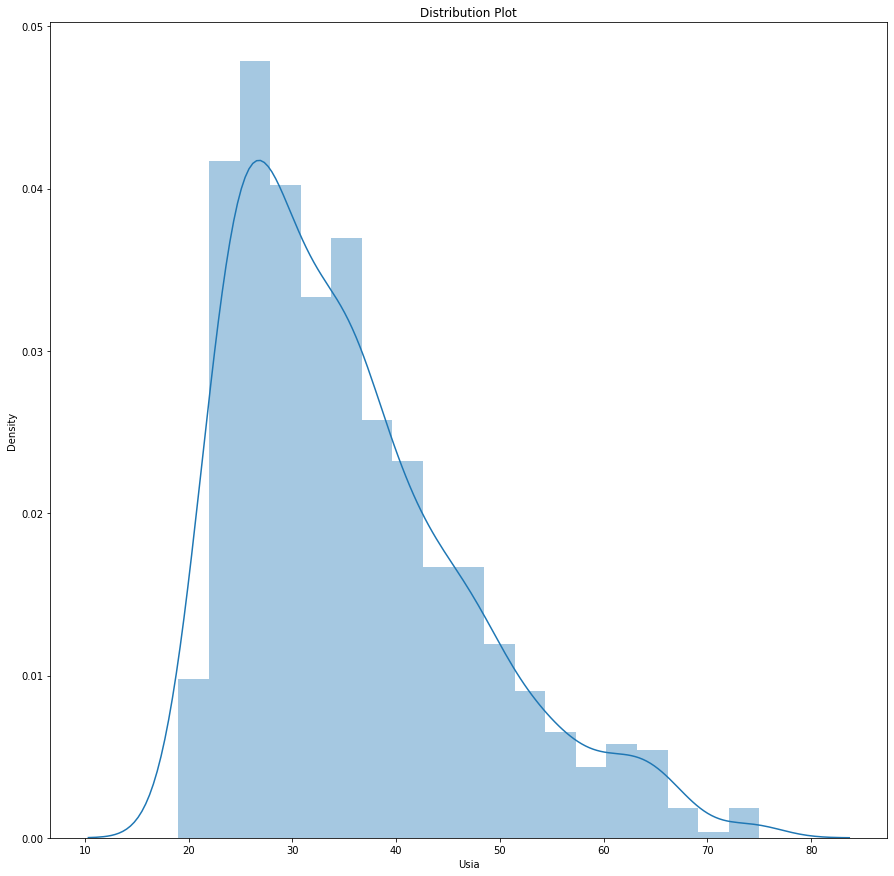

In [21]:
# Fungsi distplot() dari library seaborn
# Perhatikan bahwa distribusi plot harus tidak memiliki data kosong / missing value.
# Oleh karena itu harus menambahkan fungsi dropna() untuk secara sementara tidak
# mengikutsertakan missing value dalam pembuatan plot distribusi

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
sns.distplot(df_clean['Usia'].dropna(), ax=ax).set_title('Distribution Plot')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


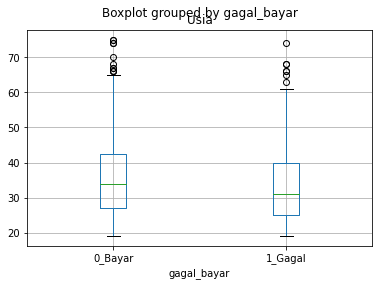

In [22]:
# Menambahkan by di fungsi boxplot untuk membagi boxplot berdasarkan gagal_bayar
df_clean.boxplot(by='gagal_bayar',column=['Usia'])

In [23]:
import numpy as np

# Untuk dapat melakukan analisa statistik, harus mengubah variabel gagal_bayar dari string menjadi angka (integer)
# Mengubah target variabel gagal_bayar menjadi angka 0 dan 1
conditions = [
             df_clean['gagal_bayar'] == '1_Gagal', 
             df_clean['gagal_bayar'] == '0_Bayar'
             ]

choices     = [
             1,
             0
             ]
df_clean['default'] = np.select(conditions,choices, default = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
# Menghitung korelasi antara variabel API_CreditScore_Vendor_Adengan default
print(df_clean['default'].corr(df_clean['Usia']))

-0.0855307226607465


In [25]:
from scipy import stats

# Uji coba hipotesis apakah ada perbedaan nilai rata-rata variabel 
# API_CreditScore_Vendor_A dengan default (gagal bayar dan tidak gagal bayar)
stats.ttest_ind( df_clean[df_clean.default == 0].Usia,
             	df_clean[df_clean.default == 1].Usia, nan_policy='omit')

Ttest_indResult(statistic=2.6235537134953963, pvalue=0.008843670376202786)

In [26]:
# 2.3.2.5.6 Memahami korelasi antar variabel dan dengan target

# Korelasi Antar semua Variabel numerik
import seaborn as sns
corr = df_clean.corr()
corr

,Lama_Cicilan,Jumlah_Pinjaman,Usia,SLIK_Cicilan_Bulanan,SLIK_Outstanding_CC,API_CreditScore_Vendor_A,API_CreditScore_Vendor_B,Device_Apps_Installed,default
Lama_Cicilan,1.000000,0.542676,-0.036392,-0.004563,0.042107,-0.040738,-0.061462,0.001850,0.198050
Jumlah_Pinjaman,0.542676,1.000000,0.038148,-0.019096,-0.019061,0.009810,-0.025668,-0.012050,0.129555
Usia,-0.036392,0.038148,1.000000,0.003229,-0.097799,0.015067,0.017040,0.029792,-0.085531
SLIK_Cicilan_Bulanan,-0.004563,-0.019096,0.003229,1.000000,0.359109,0.016146,-0.102057,-0.000999,0.275605
SLIK_Outstanding_CC,0.042107,-0.019061,-0.097799,0.359109,1.000000,-0.069180,-0.087571,-0.074525,0.330952
API_CreditScore_Vendor_A,-0.040738,0.009810,0.015067,0.016146,-0.069180,1.000000,-0.003363,0.026653,-0.041783
API_CreditScore_Vendor_B,-0.061462,-0.025668,0.017040,-0.102057,-0.087571,-0.003363,1.000000,-0.011990,-0.164541
Device_Apps_Installed,0.001850,-0.012050,0.029792,-0.000999,-0.074525,0.026653,-0.011990,1.000000,-0.119973
default,0.198050,0.129555,-0.085531,0.275605,0.330952,-0.041783,-0.164541,-0.119973,1.000000


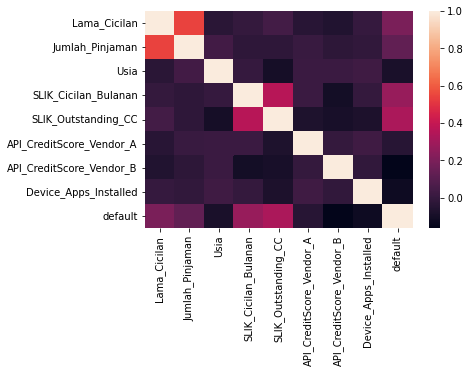

In [27]:
# Korelasi secara visualisasi
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 990
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              936 non-null    category
 1   gagal_bayar                     936 non-null    category
 2   Lama_Cicilan                    936 non-null    float64 
 3   Tujuan_Pinjaman                 936 non-null    category
 4   Jumlah_Pinjaman                 936 non-null    float64 
 5   Pekerjaan                       936 non-null    category
 6   Pendapatan_perbulan             936 non-null    category
 7   Lama_Bekerja                    936 non-null    category
 8   Status                          936 non-null    category
 9   Kepemilikan_Rumah               936 non-null    category
 10  Alamat_Rumah                    936 non-null    category
 11  Alamat_Kantor                   936 non-null    category
 12  Usia                  

In [29]:
# 2.3.2.5.6.2 Memahami korelasi antar variabel independent 

# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df_clean.select_dtypes(include=['float64','int64','int'])
df_kategori = df_clean.select_dtypes(exclude = ['float64','int64','int'])

# Menghapus kolom yang tidak berkaitan dengan korelasi antar variabel independent
df_kategori.drop(columns=['ID', 'gagal_bayar'], inplace=True)

from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.get_dummies(data = df_kategori)

# Kode Python berdasarkan referensi dari https://www.analyticsvidhya.com/blog/2021/06/decoding-the-chi-square-test%E2%80%8A-%E2%80%8Ause-along-with-implementation-and-visualization/
resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)
for i in list(df.columns):
    for j in list(df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df.to_csv('chi_square.csv') 
files.download('chi_square.csv')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                                            Tujuan_Pinjaman_TV  ...  Email_Domain_Type_Public_Domain
Tujuan_Pinjaman_TV                                    0.000000  ...                     9.087156e-02
Tujuan_Pinjaman_barang_baru                           0.126689  ...                     3.787251e-01
Tujuan_Pinjaman_barang_bekas                          0.306080  ...                     4.537606e-04
Tujuan_Pinjaman_buka_bisnis                           0.316268  ...                     1.138674e-03
Tujuan_Pinjaman_elektronik                            0.185945  ...                     2.985615e-01
...                                                        ...  ...                              ...
Mobile_Number_Active_Since_3_1_ke_2_tahun             0.201610  ...                     1.637263e-01
Mobile_Number_Active_Since_4_2_ke_5_tahun             0.174173  ...                     2.039536e-01
Mobile_Number_Active_Since_5_Lebih_5_tahun            0.522537  ...                     4.7

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
# Menghindari multikolinearitas antara Lama_Cicilan dan Jumlah_Pinjaman
df_clean.drop(columns=['Jumlah_Pinjaman'], inplace=True)

In [31]:
# 2.3.2.5.7.3 Penggunaan WOE dan IV dalam Scorecard
# Reference https://stackoverflow.com/questions/60892714/how-to-get-the-weight-of-evidence-woe-and-information-value-iv-in-python-pan

df_woe_iv = (pd.crosstab(df_clean['SLIK_Kolektibilitas'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

default,0,1,woe,iv
SLIK_Kolektibilitas,,,,
Kolek 1,0.345979,0.148014,-0.849068,0.340328
Kolek 2,0.086495,0.090253,0.042531,0.340328
Kolek 3,0.496206,0.541516,0.087381,0.340328
Kolek 4,0.009105,0.028881,1.154388,0.340328
Kolek 5,0.030349,0.097473,1.166811,0.340328
Tidak_Ditemukan,0.031866,0.093863,1.080280,0.340328


In [70]:
# Variabel SLIK_Kolektibilitas

conditions = [
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 1' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 2' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 3' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 4' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 5' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Tidak_Ditemukan' )
             ]

choices = [
          '1',
          '2&3',
          '4&5&Tidak_Ditemukan'
          ]

df_clean['SLIK_Kolektibilitas_Bin'] = np.select(conditions, choices)

# Untuk melihat proporsi (dalam persentase) dari variabel Usia
print(df_clean['SLIK_Kolektibilitas_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['SLIK_Kolektibilitas_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 1' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 2' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 3' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 4' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 5' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Tidak_Ditemukan' )
             ]

choices = [
          -0.849068,
          0.080849,
          1.127432
          ]

df_clean['SLIK_Kolektibilitas_WOE'] = np.select(conditions, choices)

2&3                    59.722222
1                      28.739316
4&5&Tidak_Ditemukan    11.538462
Name: SLIK_Kolektibilitas_Bin, dtype: float64
default                         0         1       woe        iv
SLIK_Kolektibilitas_Bin                                        
1                        0.345979  0.148014 -0.849068  0.339923
2&3                      0.582701  0.631769  0.080849  0.339923
4&5&Tidak_Ditemukan      0.071320  0.220217  1.127432  0.339923


In [66]:
# Variabel Usia

conditions = [
             ( df_clean['Usia'] <= 23 ),
             ( df_clean['Usia'] >= 24 ) & ( df_clean['Usia'] <= 26 ),
             ( df_clean['Usia'] >= 27 ) & ( df_clean['Usia'] <= 28 ),
             ( df_clean['Usia'] >= 29 ) & ( df_clean['Usia'] <= 31 ),
             ( df_clean['Usia'] >= 32 ) & ( df_clean['Usia'] <= 34 ),
             ( df_clean['Usia'] >= 35 ) & ( df_clean['Usia'] <= 37 ),
             ( df_clean['Usia'] >= 38 ) & ( df_clean['Usia'] <= 42 ),
             ( df_clean['Usia'] >= 43 ) & ( df_clean['Usia'] <= 48 ),
             ( df_clean['Usia'] >= 49 )
             ]

choices = [
          '1.<=23',
          '2.24-26',
          '3.27-28',
          '4.29-31',
          '5.32-34',
          '6.35-37',
          '7.38-42',
          '8.43-48',
          '9.>=49'
          ]
df_clean['Usia_Bin'] = np.select(conditions, choices)

# Untuk melihat proporsi (dalam persentase) dari variabel Usia
print(df_clean['Usia_Bin'].value_counts(normalize=True) * 100)

print(pd.crosstab(df_clean['Usia_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Usia_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Usia'] <= 23 ),
             ( df_clean['Usia'] >= 24 ) & ( df_clean['Usia'] <= 26 ),
             ( df_clean['Usia'] >= 27 ) & ( df_clean['Usia'] <= 28 ),
             ( df_clean['Usia'] >= 29 ) & ( df_clean['Usia'] <= 31 ),
             ( df_clean['Usia'] >= 32 ) & ( df_clean['Usia'] <= 34 ),
             ( df_clean['Usia'] >= 35 ) & ( df_clean['Usia'] <= 37 ),
             ( df_clean['Usia'] >= 38 ) & ( df_clean['Usia'] <= 42 ),
             ( df_clean['Usia'] >= 43 ) & ( df_clean['Usia'] <= 48 ),
             ( df_clean['Usia'] >= 49 )
             ]

choices = [
          '1.<=23',
          '2.24-26',
          '3.27-28',
          '4.29-31',
          '5.32-34',
          '6.35-37',
          '7.38-42',
          '8.43-48',
          '9.>=49'
          ]
df_clean['Usia_WOE'] = np.select(conditions, choices)

9.>=49     13.888889
2.24-26    13.782051
7.38-42    11.538462
4.29-31    11.111111
6.35-37    10.683761
1.<=23     10.576923
8.43-48     9.829060
5.32-34     9.401709
3.27-28     9.188034
Name: Usia_Bin, dtype: float64
default    0   1
Usia_Bin        
1.<=23    59  40
2.24-26   79  50
3.27-28   62  24
4.29-31   73  31
5.32-34   59  29
6.35-37   82  18
7.38-42   80  28
8.43-48   68  24
9.>=49    97  33
default          0         1       woe        iv
Usia_Bin                                        
1.<=23    0.089530  0.144404  0.478048  0.105209
2.24-26   0.119879  0.180505  0.409281  0.105209
3.27-28   0.094082  0.086643 -0.082375  0.105209
4.29-31   0.110774  0.111913  0.010234  0.105209
5.32-34   0.089530  0.104693  0.156464  0.105209
6.35-37   0.124431  0.064982 -0.649641  0.105209
7.38-42   0.121396  0.101083 -0.183116  0.105209
8.43-48   0.103187  0.086643 -0.174748  0.105209
9.>=49    0.147193  0.119134 -0.211497  0.105209


In [68]:
# Variabel Usia revisi Bin

conditions = [
             ( df_clean['Usia'] <= 23 ),
             ( df_clean['Usia'] >= 24 ) & ( df_clean['Usia'] <= 26 ),
             ( df_clean['Usia'] >= 27 ) & ( df_clean['Usia'] <= 34 ),
             ( df_clean['Usia'] >= 35 )
             ]

choices = [
          '1.<=23',
          '2.24-26',
          '3.27-34',
          '4.>=35'
          ]
df_clean['Usia_Bin'] = np.select(conditions, choices)

# Untuk melihat proporsi (dalam persentase) dari variabel Usia
print(df_clean['Usia_Bin'].value_counts(normalize=True) * 100)

print(pd.crosstab(df_clean['Usia_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Usia_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Usia'] <= 23 ),
             ( df_clean['Usia'] >= 24 ) & ( df_clean['Usia'] <= 26 ),
             ( df_clean['Usia'] >= 27 ) & ( df_clean['Usia'] <= 34 ),
             ( df_clean['Usia'] >= 35 )
             ]

choices = [
          0.478048,
          0.409281,
          0.029665,
          -0.288525
          ]
df_clean['Usia_WOE'] = np.select(conditions, choices)

4.>=35     45.940171
3.27-34    29.700855
2.24-26    13.782051
1.<=23     10.576923
Name: Usia_Bin, dtype: float64
default     0    1
Usia_Bin          
1.<=23     59   40
2.24-26    79   50
3.27-34   194   84
4.>=35    327  103
default          0         1       woe        iv
Usia_Bin                                        
1.<=23    0.089530  0.144404  0.478048  0.087192
2.24-26   0.119879  0.180505  0.409281  0.087192
3.27-34   0.294385  0.303249  0.029665  0.087192
4.>=35    0.496206  0.371841 -0.288525  0.087192


In [61]:
# Variabel Tujuan_Pinjaman

# Untuk melihat proporsi (dalam persentase) dari variabel Tujuan_Pinjaman
print(df_clean['Tujuan_Pinjaman'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['Tujuan_Pinjaman'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( (df_clean['Tujuan_Pinjaman'] == 'pendidikan') | (df_clean['Tujuan_Pinjaman'] == 'barang_bekas') ), 
             ( df_clean['Tujuan_Pinjaman'] == 'peralatan_rumahtangga' ),
             ( (df_clean['Tujuan_Pinjaman'] == 'makanan') | (df_clean['Tujuan_Pinjaman'] == 'elektronik') ),
             ( (df_clean['Tujuan_Pinjaman'] == 'TV') | (df_clean['Tujuan_Pinjaman'] == 'buka_bisnis') | (df_clean['Tujuan_Pinjaman'] == 'reparasi') | (df_clean['Tujuan_Pinjaman'] == 'barang_baru')  ), 
             ( df_clean['Tujuan_Pinjaman'] == 'liburan' )
             ]

choices = [
          '1.pendidikan|bekas',
          '2.peralatan_rumahtangga',
          '3.elektronik|makanan',
          '4.TV|bisnis|reparasi|baru',
          '5.liburan'
          ]
df_clean['Tujuan_Pinjaman_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Tujuan_Pinjaman_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Tujuan_Pinjaman_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( (df_clean['Tujuan_Pinjaman'] == 'pendidikan') | (df_clean['Tujuan_Pinjaman'] == 'barang_bekas') ), 
             ( df_clean['Tujuan_Pinjaman'] == 'peralatan_rumahtangga' ),
             ( (df_clean['Tujuan_Pinjaman'] == 'makanan') | (df_clean['Tujuan_Pinjaman'] == 'elektronik') ),
             ( (df_clean['Tujuan_Pinjaman'] == 'TV') | (df_clean['Tujuan_Pinjaman'] == 'buka_bisnis') | (df_clean['Tujuan_Pinjaman'] == 'reparasi') | (df_clean['Tujuan_Pinjaman'] == 'barang_baru')  ), 
             ( df_clean['Tujuan_Pinjaman'] == 'liburan' )
             ]

choices = [
          -0.860515,
          -0.407615,
          0.123962,
          0.320162,
          0.738873
          ]
df_clean['Tujuan_Pinjaman_WOE'] = np.select(conditions, choices)


peralatan_rumahtangga    28.846154
barang_baru              23.076923
elektronik               17.307692
barang_bekas             10.363248
buka_bisnis               9.935897
liburan                   5.021368
makanan                   2.243590
reparasi                  1.175214
TV                        1.068376
pendidikan                0.961538
Name: Tujuan_Pinjaman, dtype: float64
default                       0         1       woe       iv
Tujuan_Pinjaman                                             
TV                     0.009105  0.014440  0.461241  0.18519
barang_baru            0.206373  0.288809  0.336078  0.18519
barang_bekas           0.124431  0.054152 -0.831963  0.18519
buka_bisnis            0.091047  0.119134  0.268869  0.18519
elektronik             0.166920  0.187726  0.117469  0.18519
liburan                0.037936  0.079422  0.738873  0.18519
makanan                0.021244  0.025271  0.173559  0.18519
pendidikan             0.012140  0.003610 -1.212736  0.18519
pe

In [63]:
# Variabel Lama_Cicilan

# Untuk melihat proporsi (dalam persentase) dari variabel Lama_Cicilan
print(df_clean['Lama_Cicilan'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['Lama_Cicilan'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Lama_Cicilan'] == 1 ), 
             ( df_clean['Lama_Cicilan'] == 2 ), 
             ( df_clean['Lama_Cicilan'] <= 4 ), 
             ( df_clean['Lama_Cicilan'] == 5 ), 
             ( df_clean['Lama_Cicilan'] == 6 )
             ]

choices = [
          '1_bulan',
          '2_bulan',
          '3-4_bulan',
          '5_bulan',
          '6_bulan'
          ]
df_clean['Lama_Cicilan_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Lama_Cicilan_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Lama_Cicilan_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['Lama_Cicilan'] == 1 ), 
             ( df_clean['Lama_Cicilan'] == 2 ), 
             ( df_clean['Lama_Cicilan'] <= 4 ), 
             ( df_clean['Lama_Cicilan'] == 5 ), 
             ( df_clean['Lama_Cicilan'] == 6 )
             ]

choices = [
          -1.055107,
          -0.263159,
          0.000786,
          0.355880,
          1.044387
          ]
df_clean['Lama_Cicilan_WOE'] = np.select(conditions, choices)

2.0    27.564103
3.0    21.153846
4.0    19.978632
5.0    12.820513
1.0    10.042735
6.0     8.440171
Name: Lama_Cicilan, dtype: float64
default              0         1       woe        iv
Lama_Cicilan                                        
1.0           0.124431  0.043321 -1.055107  0.226017
2.0           0.295903  0.227437 -0.263159  0.226017
3.0           0.210926  0.212996  0.009770  0.226017
4.0           0.200303  0.198556 -0.008763  0.226017
5.0           0.113809  0.162455  0.355880  0.226017
6.0           0.054628  0.155235  1.044387  0.226017
default             0    1
Lama_Cicilan_Bin          
1_bulan            82   12
2_bulan           195   63
3-4_bulan         271  114
5_bulan            75   45
6_bulan            36   43
default                  0         1       woe        iv
Lama_Cicilan_Bin                                        
1_bulan           0.124431  0.043321 -1.055107  0.225981
2_bulan           0.295903  0.227437 -0.263159  0.225981
3-4_bulan         0.41

In [73]:
# Variabel Device_Apps_Segmentation

# Untuk melihat proporsi (dalam persentase) dari variabel Device_Apps_Segmentation
print(df_clean['Device_Apps_Segmentation'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['Device_Apps_Segmentation'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Device_Apps_Segmentation'] == 'Productivity' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Social_Media' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Shopping' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Games' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Online_Lending' )
             ]

choices = [
          '1.Productivity',
          '2.Social_Media',
          '3.Shopping',
          '4.Games',
          '5.Online_Lending'
          ]
df_clean['Device_Apps_Segmentation_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Device_Apps_Segmentation_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Device_Apps_Segmentation_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['Device_Apps_Segmentation'] == 'Productivity' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Social_Media' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Shopping' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Games' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Online_Lending' )
             ]

choices = [
          -0.455050,
          -0.198005,
          -0.130810,
          0.131595,
          0.697288
          ]
df_clean['Device_Apps_Segmentation_WOE'] = np.select(conditions, choices)

Games             23.076923
Social_Media      20.833333
Shopping          20.619658
Productivity      20.299145
Online_Lending    15.170940
Name: Device_Apps_Segmentation, dtype: float64
default                          0         1       woe        iv
Device_Apps_Segmentation                                        
Games                     0.221548  0.252708  0.131595  0.135374
Online_Lending            0.116844  0.234657  0.697288  0.135374
Productivity              0.227618  0.144404 -0.455050  0.135374
Shopping                  0.213961  0.187726 -0.130810  0.135374
Social_Media              0.220030  0.180505 -0.198005  0.135374
default                         0   1
Device_Apps_Segmentation_Bin         
1.Productivity                150  40
2.Social_Media                145  50
3.Shopping                    141  52
4.Games                       146  70
5.Online_Lending               77  65
default                              0         1       woe        iv
Device_Apps_Segmentatio

default    0   1
Usia_Bin        
1.<=23    59  40
2.24-26   79  50
3.27-28   62  24
4.29-31   73  31
5.32-34   59  29
6.35-37   82  18
7.38-42   80  28
8.43-48   68  24
9.>=49    97  33


default,0,1,woe,iv
Usia_Bin2,,,,
1.<=23,0.089530,0.144404,0.478048,0.087192
2.24-26,0.119879,0.180505,0.409281,0.087192
3.27-34,0.294385,0.303249,0.029665,0.087192
4.>=35,0.496206,0.371841,-0.288525,0.087192


In [35]:
# 2.3.3.1.1 Variabel Debt Burden Ratio (DBR)

conditions = [
             ( df_clean['Pendapatan_perbulan'] == '1. < 1 juta' ),
             ( df_clean['Pendapatan_perbulan'] == '2. 1 - 5 juta' ),
             ( df_clean['Pendapatan_perbulan'] == '3. 5 - 10 juta' ),
             ( df_clean['Pendapatan_perbulan'] == '4. 10 - 20 juta' ),
             ( df_clean['Pendapatan_perbulan'] == '5. >20 juta' )
             ]

choices = [
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 1000000 ),
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 5000000 ),
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 10000000 ),
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 20000000 ),
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 30000000 )
          ]
df_clean['DBR'] = np.select(conditions, choices)

In [36]:
# 2.3.3.1.2 Apakah alamat kantor dan rumah berdekatan?

conditions = [
             ( df_clean['Alamat_Rumah'] == df_clean['Alamat_Kantor'] ),
             ( df_clean['Alamat_Rumah'] != df_clean['Alamat_Kantor'] ),
             ]

choices = [
          1,
          0
          ]
df_clean['Alamat_Rumah_Kantor'] = np.select(conditions, choices)

In [37]:
df_score_manual = df_clean[['SLIK_Kolektibilitas_Bin','default']]

conditions = [
             ( df_clean['SLIK_Kolektibilitas'] == 1 ),
             ( df_clean['SLIK_Kolektibilitas'] == 2 ) | ( df_clean['SLIK_Kolektibilitas'] == 3 ),
             ( df_clean['SLIK_Kolektibilitas'] == 4 ) | ( df_clean['SLIK_Kolektibilitas'] == 5 )
             ]
choices = [
          -0.801299,
          0.152287,
          1.223173
          ]

df_score_manual['SLIK_Kolektibilitas_WOE'] = np.select(conditions, choices)
df_score_manual = df_score_manual[['SLIK_Kolektibilitas_WOE','default']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
y_train = df_score_manual.loc[:,'default']
X_train = df_score_manual.loc[:,df_score_manual.columns != 'default']

print(X_train)
print(y_train)

     SLIK_Kolektibilitas_WOE
0                        0.0
1                        0.0
2                        0.0
3                        0.0
4                        0.0
..                       ...
986                      0.0
987                      0.0
988                      0.0
989                      0.0
990                      0.0

[936 rows x 1 columns]
0      1
1      1
2      1
3      1
4      1
      ..
986    0
987    0
988    0
989    0
990    0
Name: default, Length: 936, dtype: int64


In [39]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.coef_)

[[0.]]


In [40]:
# install scorecardpy
!pip install -q scorecardpy
#!pip install git+git://github.com/shichenxie/scorecardpy.git

     |████████████████████████████████| 55 kB 2.3 MB/s 


In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 990
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              936 non-null    category
 1   gagal_bayar                     936 non-null    category
 2   Lama_Cicilan                    936 non-null    float64 
 3   Tujuan_Pinjaman                 936 non-null    category
 4   Pekerjaan                       936 non-null    category
 5   Pendapatan_perbulan             936 non-null    category
 6   Lama_Bekerja                    936 non-null    category
 7   Status                          936 non-null    category
 8   Kepemilikan_Rumah               936 non-null    category
 9   Alamat_Rumah                    936 non-null    category
 10  Alamat_Kantor                   936 non-null    category
 11  Usia                            936 non-null    float64 
 12  Lama_tinggal_ditempat_

[INFO] creating woe binning ...


{'API_CreditScore_Vendor_A': <Figure size 432x288 with 2 Axes>,
 'API_CreditScore_Vendor_B': <Figure size 432x288 with 2 Axes>,
 'DBR': <Figure size 432x288 with 2 Axes>,
 'Device_Active_Since': <Figure size 432x288 with 2 Axes>,
 'Device_Apps_Installed': <Figure size 432x288 with 2 Axes>,
 'Device_Apps_Segmentation': <Figure size 432x288 with 2 Axes>,
 'Lama_Cicilan': <Figure size 432x288 with 2 Axes>,
 'Mobile_Number_Active_Since': <Figure size 432x288 with 2 Axes>,
 'Mobile_Provider': <Figure size 432x288 with 2 Axes>,
 'SLIK_Kolektibilitas': <Figure size 432x288 with 2 Axes>,
 'Tujuan_Pinjaman': <Figure size 432x288 with 2 Axes>,
 'Usia': <Figure size 432x288 with 2 Axes>}

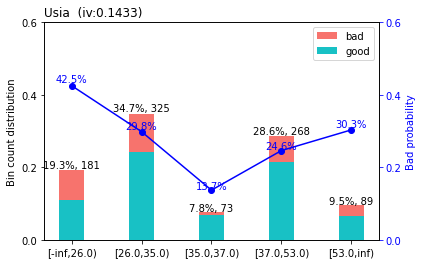

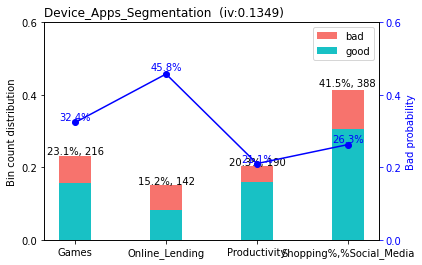

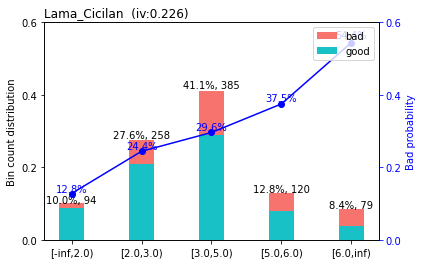

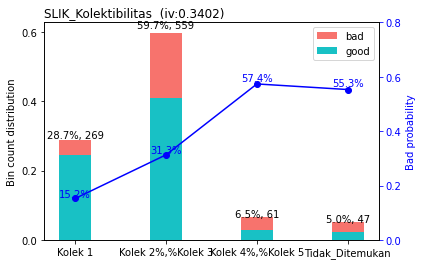

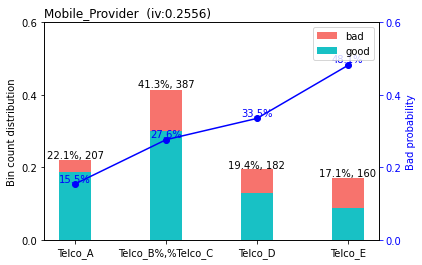

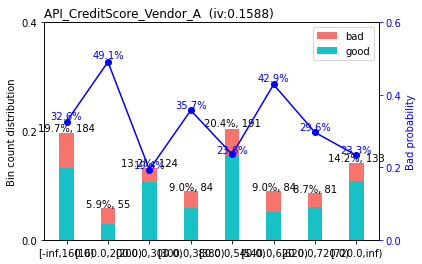

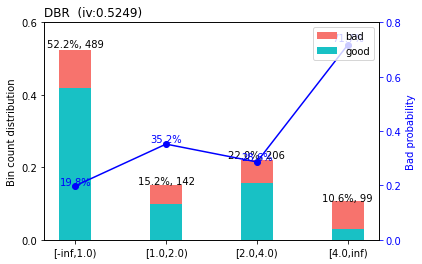

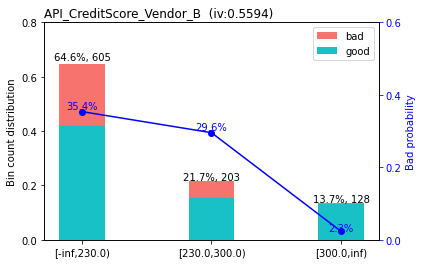

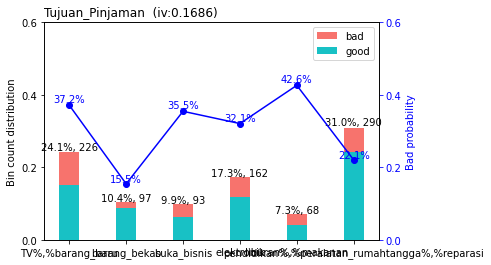

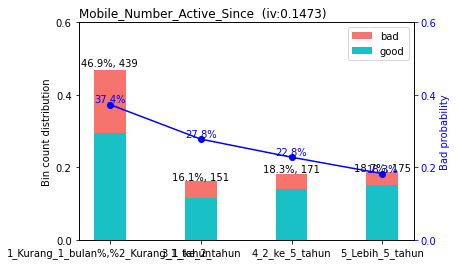

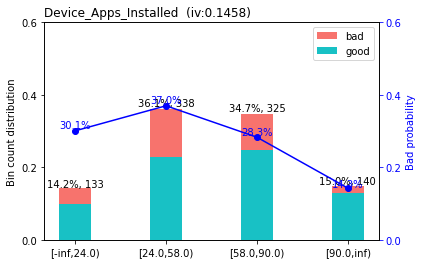

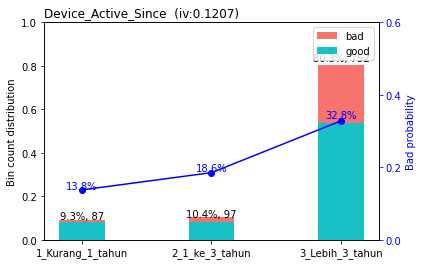

In [42]:
#df_score_test = df_clean[['SLIK_Kolektibilitas_Bin','default']]
df_score_test = df_clean[['default','Tujuan_Pinjaman','Lama_Cicilan','SLIK_Kolektibilitas'
,'Usia','API_CreditScore_Vendor_A','API_CreditScore_Vendor_B','Device_Apps_Installed'
,'Device_Active_Since','Device_Apps_Segmentation','Mobile_Provider','Mobile_Number_Active_Since'
,'DBR']]
# isu SLIK_Kolektibilitas

# Credit Scoring using logistic regression with library scorecardpy
import scorecardpy as scpy

# Melakukan WOE binning
bins = scpy.woebin(df_score_test, y = 'default')
scpy.woebin_plot(bins)

In [43]:
# converting train and test into woe values
#train_woe = scpy.woebin_ply(df_score_test, bins)
# breaking dt_s menjadi training dan test dataset
train, test = scpy.split_df(df_score_test, y='default').values()

# converting train and test into woe values
train_woe = scpy.woebin_ply(train, bins)
test_woe = scpy.woebin_ply(test, bins)

y_train = train_woe.loc[:,'default']
X_train = train_woe.loc[:,train_woe.columns != 'default']
y_test = test_woe.loc[:,'default']
X_test = test_woe.loc[:,train_woe.columns != 'default']

print(X_train)
print(y_train)

[INFO] converting into woe values ...


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


[INFO] converting into woe values ...
     Usia_woe  ...  Device_Active_Since_woe
0   -0.251907  ...                 0.151536
1    0.566121  ...                 0.151536
4    0.012071  ...                 0.151536
5   -0.251907  ...                 0.151536
6    0.012071  ...                 0.151536
..        ...  ...                      ...
983  0.012071  ...                -0.965875
985  0.012071  ...                 0.151536
987  0.012071  ...                -0.612370
989 -0.251907  ...                 0.151536
990  0.566121  ...                 0.151536

[655 rows x 12 columns]
0      1
1      1
4      1
5      1
6      1
      ..
983    0
985    0
987    0
989    0
990    0
Name: default, Length: 655, dtype: int64


In [44]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.coef_)

[[0.70836496 0.46638564 1.20833074 0.31382597 0.54864749 1.10510091
  0.37529811 1.01284255 1.31066671 0.48798526 1.0680982  0.43211375]]


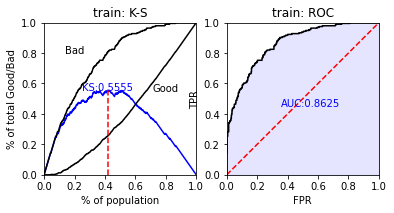

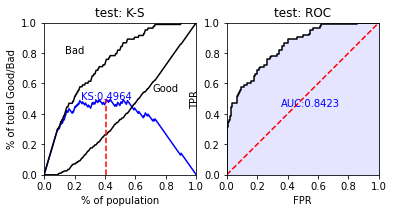

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


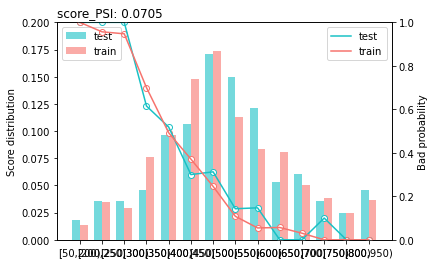

{'pic': {'score': <Figure size 432x288 with 2 Axes>},
 'psi':   variable       PSI
 0    score  0.070522}

In [45]:
# predicted probability
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = scpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scpy.perf_eva(y_test, test_pred, title = "test")

# score ------
card = scpy.scorecard(bins, lr, X_train.columns)
# credit score
train_score = scpy.scorecard_ply(train, card, print_step=0)
test_score = scpy.scorecard_ply(test, card, print_step=0)

# psi
scpy.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [46]:
# For those that want to know the statistic modeling
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, X_train.astype(float))
result = model.fit()

result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.464012
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  655
Model:                          Logit   Df Residuals:                      643
Method:                           MLE   Df Model:                           11
Date:                Sat, 25 Sep 2021   Pseudo R-squ.:                  0.2363
Time:                        05:16:24   Log-Likelihood:                -303.93
converged:                       True   LL-Null:                       -397.98
Covariance Type:            nonrobust   LLR p-value:                 2.179e-34
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Usia_woe                           0.5876      0.267      2.204      0.027       0.065       1.110
Device_Apps_Segmentation_woe       0.6938      0.315      2.204      0.027       0.077       1.311
SLIK_Kolektibilitas_woe            1.2442      0.192      6.497      0.000       0.869       1.620
Lama_Cicilan_woe                   0.2670      0.356      0.750      0.453      -0.431       0.965
Mobile_Provider_woe                0.4983      0.280      1.779      0.075      -0.051       1.047
DBR_woe                            1.2529      0.171      7.328      0.000       0.918       1.588
API_CreditScore_Vendor_A_woe       0.5299      0.257      2.059      0.039       0.025       1.034
API_CreditScore_Vendor_B_woe       0.7507      0.145      5.193      0.000       0.467       1.034
Tujuan_Pinjaman_woe                1.3628      0.250      5.448      0.000       0.873       1.853
Mobile_Number_Active_Since_woe     0.4903      0.261      1.878      0.060      -0.021       1.002
Device_Apps_Installed_woe          1.0418      0.266      3.915      0.000       0.520       1.563
Device_Active_Since_woe            0.4854      0.345      1.406      0.160      -0.191       1.162
==================================================================================================
"""